# Reconnaissance d’écriture par réseaux de neurones
## Chargement de la base de données digits disponible sous sklearn

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
digits = load_digits()

## Affichage d'une image

<Figure size 432x288 with 0 Axes>

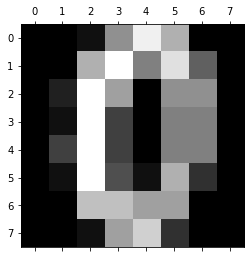

In [3]:
plt.gray()
plt.matshow(digits.images[10])
plt.show()

## Récupération des données et des labels

In [4]:
X = digits.data
y = digits.target

## Affichage du nombre d'exemples par classe

In [5]:
print("Il y a ", y.size , "exemples en tout dans le dataset dont :")
[print ( digits.data[digits.target == a].shape[0], "exemples d'images de",a) for a in list(range(10))]


Il y a  1797 exemples en tout dans le dataset dont :
178 exemples d'images de 0
182 exemples d'images de 1
177 exemples d'images de 2
183 exemples d'images de 3
181 exemples d'images de 4
182 exemples d'images de 5
181 exemples d'images de 6
179 exemples d'images de 7
174 exemples d'images de 8
180 exemples d'images de 9


[None, None, None, None, None, None, None, None, None, None]

## Dimensionalité des données

In [6]:
print("les données ont", X.shape[1], "dimensions")
print("Chaque dimension correspond à un pixel, qui peut prendre les valeurs:",np.unique(X))

les données ont 64 dimensions
Chaque dimension correspond à un pixel, qui peut prendre les valeurs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


## Séparation en base d'apprentissage et base de test

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

## Etude de l'influence du nombre de neurones de la couche cachée sur le résultat (attention, ce calcul prends approximativement 30 minutes d'éxécution)

In [12]:
clfArray = []
clfResults = []
i = 0;
for numNeuroneCache in range(4,27,2):
    clfArray.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
    clfArray[i].fit(X_train,y_train)
    clfResults.append(clfArray[i].score(X_test,y_test))
    i += 1


Iteration 1, loss = 2.22745851
Iteration 2, loss = 1.95998209
Iteration 3, loss = 1.93767094
Iteration 4, loss = 1.73257680
Iteration 5, loss = 1.77639630
Iteration 6, loss = 1.64129487
Iteration 7, loss = 1.55586195
Iteration 8, loss = 1.58749516
Iteration 9, loss = 1.55334847
Iteration 10, loss = 1.56588096
Iteration 11, loss = 1.55166676
Iteration 12, loss = 1.47838260
Iteration 13, loss = 1.51692469
Iteration 14, loss = 1.48959179
Iteration 15, loss = 1.58981470
Iteration 16, loss = 1.47224901
Iteration 17, loss = 1.52895022
Iteration 18, loss = 1.44662324
Iteration 19, loss = 1.43600558
Iteration 20, loss = 1.53697833
Iteration 21, loss = 1.59995709
Iteration 22, loss = 1.49079193
Iteration 23, loss = 1.52851332
Iteration 24, loss = 1.53052621
Iteration 25, loss = 1.44154003
Iteration 26, loss = 1.44141306
Iteration 27, loss = 1.42146104
Iteration 28, loss = 1.40160092
Iteration 29, loss = 1.41312423
Iteration 30, loss = 1.42337985
Iteration 31, loss = 1.48980538
Iteration 32, los

Iteration 52, loss = 0.87537805
Iteration 53, loss = 0.86378186
Iteration 54, loss = 0.86987588
Iteration 55, loss = 0.86943659
Iteration 56, loss = 0.85174633
Iteration 57, loss = 0.85737973
Iteration 58, loss = 0.85745915
Iteration 59, loss = 0.84545617
Iteration 60, loss = 0.85677827
Iteration 61, loss = 0.84535645
Iteration 62, loss = 0.84268827
Iteration 63, loss = 0.84225437
Iteration 64, loss = 0.84711922
Iteration 65, loss = 0.84005550
Iteration 66, loss = 0.84127325
Iteration 67, loss = 0.84071438
Iteration 68, loss = 0.84021212
Iteration 69, loss = 0.83172777
Iteration 70, loss = 0.83665229
Iteration 71, loss = 0.84643458
Iteration 72, loss = 0.84181757
Iteration 73, loss = 0.83160340
Iteration 74, loss = 0.84326974
Iteration 75, loss = 0.84949271
Iteration 76, loss = 0.87407199
Iteration 77, loss = 0.85235324
Iteration 78, loss = 0.87234029
Iteration 79, loss = 0.87472917
Iteration 80, loss = 0.83223948
Iteration 81, loss = 0.84488211
Iteration 82, loss = 0.82770257
Iteratio

Iteration 110, loss = 0.63816735
Iteration 111, loss = 0.63856995
Iteration 112, loss = 0.63697814
Iteration 113, loss = 0.63703617
Iteration 114, loss = 0.63667070
Iteration 115, loss = 0.63742333
Iteration 116, loss = 0.63676570
Iteration 117, loss = 0.63650672
Iteration 118, loss = 0.63679417
Iteration 119, loss = 0.63645569
Iteration 120, loss = 0.63638971
Iteration 121, loss = 0.63649357
Iteration 122, loss = 0.63621620
Iteration 123, loss = 0.63618662
Iteration 124, loss = 0.63619359
Iteration 125, loss = 0.63622418
Iteration 126, loss = 0.63625469
Iteration 127, loss = 0.63619791
Iteration 128, loss = 0.63591505
Iteration 129, loss = 0.63565706
Iteration 130, loss = 0.63561087
Iteration 131, loss = 0.63523874
Iteration 132, loss = 0.63513057
Iteration 133, loss = 0.63516779
Iteration 134, loss = 0.63490127
Iteration 135, loss = 0.63489218
Iteration 136, loss = 0.63487490
Iteration 137, loss = 0.63461994
Iteration 138, loss = 0.63458553
Iteration 139, loss = 0.63511919
Iteration 

Iteration 121, loss = 0.15582593
Iteration 122, loss = 0.15555882
Iteration 123, loss = 0.15542072
Iteration 124, loss = 0.15521093
Iteration 125, loss = 0.17422737
Iteration 126, loss = 0.15860444
Iteration 127, loss = 0.15591319
Iteration 128, loss = 0.15410738
Iteration 129, loss = 0.15591751
Iteration 130, loss = 0.15439809
Iteration 131, loss = 0.15247106
Iteration 132, loss = 0.15403686
Iteration 133, loss = 0.15910229
Iteration 134, loss = 0.15661723
Iteration 135, loss = 0.15102190
Iteration 136, loss = 0.14939561
Iteration 137, loss = 0.14898643
Iteration 138, loss = 0.14925132
Iteration 139, loss = 0.15382093
Iteration 140, loss = 0.15001034
Iteration 141, loss = 0.14850149
Iteration 142, loss = 0.14918296
Iteration 143, loss = 0.14834948
Iteration 144, loss = 0.14804056
Iteration 145, loss = 0.14781137
Iteration 146, loss = 0.14771533
Iteration 147, loss = 0.14752933
Iteration 148, loss = 0.14734958
Iteration 149, loss = 0.14727078
Iteration 150, loss = 0.14716780
Iteration 

Iteration 69, loss = 0.29772197
Iteration 70, loss = 0.26324630
Iteration 71, loss = 0.32014068
Iteration 72, loss = 0.35033078
Iteration 73, loss = 0.25424465
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 74, loss = 0.18706168
Iteration 75, loss = 0.16582424
Iteration 76, loss = 0.15589799
Iteration 77, loss = 0.15514015
Iteration 78, loss = 0.13656169
Iteration 79, loss = 0.15405056
Iteration 80, loss = 0.15038576
Iteration 81, loss = 0.14972454
Iteration 82, loss = 0.14249946
Iteration 83, loss = 0.14535143
Iteration 84, loss = 0.14142105
Iteration 85, loss = 0.14124354
Iteration 86, loss = 0.13860399
Iteration 87, loss = 0.13661197
Iteration 88, loss = 0.12573904
Iteration 89, loss = 0.13143953
Iteration 90, loss = 0.12048696
Iteration 91, loss = 0.11739890
Iteration 92, loss = 0.12142292
Iteration 93, loss = 0.11878774
Iteration 94, loss = 0.12011216
Iteration 95, loss = 0.11870560
Iteration 96, loss = 0

Iteration 14, loss = 0.56144535
Iteration 15, loss = 0.55996740
Iteration 16, loss = 0.62571212
Iteration 17, loss = 0.39233871
Iteration 18, loss = 0.37495653
Iteration 19, loss = 0.44125773
Iteration 20, loss = 0.44606065
Iteration 21, loss = 0.37943147
Iteration 22, loss = 0.28351410
Iteration 23, loss = 0.27263059
Iteration 24, loss = 0.34623200
Iteration 25, loss = 0.27920934
Iteration 26, loss = 0.25687905
Iteration 27, loss = 0.29318523
Iteration 28, loss = 0.28132187
Iteration 29, loss = 0.26776011
Iteration 30, loss = 0.24478169
Iteration 31, loss = 0.24032591
Iteration 32, loss = 0.29653804
Iteration 33, loss = 0.32825004
Iteration 34, loss = 0.25673106
Iteration 35, loss = 0.28423216
Iteration 36, loss = 0.34266222
Iteration 37, loss = 0.33170414
Iteration 38, loss = 0.29383383
Iteration 39, loss = 0.24857430
Iteration 40, loss = 0.26723695
Iteration 41, loss = 0.25986231
Iteration 42, loss = 0.22390482
Iteration 43, loss = 0.20850917
Iteration 44, loss = 0.23879024
Iteratio

Iteration 50, loss = 0.13617229
Iteration 51, loss = 0.13183308
Iteration 52, loss = 0.13743647
Iteration 53, loss = 0.13752528
Iteration 54, loss = 0.13121536
Iteration 55, loss = 0.13954908
Iteration 56, loss = 0.12263319
Iteration 57, loss = 0.13218819
Iteration 58, loss = 0.12291438
Iteration 59, loss = 0.11902226
Iteration 60, loss = 0.11596398
Iteration 61, loss = 0.11209703
Iteration 62, loss = 0.11073915
Iteration 63, loss = 0.11402077
Iteration 64, loss = 0.11080766
Iteration 65, loss = 0.10872749
Iteration 66, loss = 0.10938646
Iteration 67, loss = 0.10791225
Iteration 68, loss = 0.10749385
Iteration 69, loss = 0.10450324
Iteration 70, loss = 0.10408812
Iteration 71, loss = 0.10396721
Iteration 72, loss = 0.10344724
Iteration 73, loss = 0.10289944
Iteration 74, loss = 0.10231254
Iteration 75, loss = 0.10211388
Iteration 76, loss = 0.10174622
Iteration 77, loss = 0.10127463
Iteration 78, loss = 0.10073614
Iteration 79, loss = 0.10051150
Iteration 80, loss = 0.10012755
Iteratio

Iteration 300, loss = 0.06117426
Iteration 301, loss = 0.06114616
Iteration 302, loss = 0.06113708
Iteration 303, loss = 0.06111556
Iteration 304, loss = 0.06109279
Iteration 305, loss = 0.06107600
Iteration 306, loss = 0.06106084
Iteration 307, loss = 0.06103901
Iteration 308, loss = 0.06102459
Iteration 309, loss = 0.06102186
Iteration 310, loss = 0.06100981
Iteration 311, loss = 0.06099682
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 312, loss = 0.06091648
Iteration 313, loss = 0.06091601
Iteration 314, loss = 0.06091507
Iteration 315, loss = 0.06091301
Iteration 316, loss = 0.06091051
Iteration 317, loss = 0.06090858
Iteration 318, loss = 0.06090687
Iteration 319, loss = 0.06090606
Iteration 320, loss = 0.06090389
Iteration 321, loss = 0.06090210
Iteration 322, loss = 0.06089981
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 323

Iteration 191, loss = 0.06217491
Iteration 192, loss = 0.06207341
Iteration 193, loss = 0.06201989
Iteration 194, loss = 0.06197024
Iteration 195, loss = 0.06188899
Iteration 196, loss = 0.06190069
Iteration 197, loss = 0.06174233
Iteration 198, loss = 0.06176542
Iteration 199, loss = 0.06160676
Iteration 200, loss = 0.06145426
Iteration 201, loss = 0.06143917
Iteration 202, loss = 0.06138475
Iteration 203, loss = 0.06131844
Iteration 204, loss = 0.06114836
Iteration 205, loss = 0.06135597
Iteration 206, loss = 0.06104097
Iteration 207, loss = 0.06108997
Iteration 208, loss = 0.06095900
Iteration 209, loss = 0.06063932
Iteration 210, loss = 0.06059191
Iteration 211, loss = 0.06058905
Iteration 212, loss = 0.06063044
Iteration 213, loss = 0.06058449
Iteration 214, loss = 0.06049068
Iteration 215, loss = 0.06030864
Iteration 216, loss = 0.06031472
Iteration 217, loss = 0.06031079
Iteration 218, loss = 0.06020211
Iteration 219, loss = 0.06006950
Iteration 220, loss = 0.06004849
Iteration 

Iteration 59, loss = 0.18470096
Iteration 60, loss = 0.18376228
Iteration 61, loss = 0.18351983
Iteration 62, loss = 0.18233304
Iteration 63, loss = 0.19187815
Iteration 64, loss = 0.18119226
Iteration 65, loss = 0.18089871
Iteration 66, loss = 0.17577749
Iteration 67, loss = 0.17557955
Iteration 68, loss = 0.17512981
Iteration 69, loss = 0.17464233
Iteration 70, loss = 0.18316630
Iteration 71, loss = 0.18143065
Iteration 72, loss = 0.18035459
Iteration 73, loss = 0.18512246
Iteration 74, loss = 0.17371204
Iteration 75, loss = 0.17518816
Iteration 76, loss = 0.17485122
Iteration 77, loss = 0.17329245
Iteration 78, loss = 0.16849296
Iteration 79, loss = 0.16913969
Iteration 80, loss = 0.16787468
Iteration 81, loss = 0.16904066
Iteration 82, loss = 0.16913835
Iteration 83, loss = 0.16699381
Iteration 84, loss = 0.17056639
Iteration 85, loss = 0.16632733
Iteration 86, loss = 0.16591938
Iteration 87, loss = 0.16743266
Iteration 88, loss = 0.16541982
Iteration 89, loss = 0.16516818
Iteratio

Iteration 302, loss = 0.12790416
Iteration 303, loss = 0.12790275
Iteration 304, loss = 0.12790053
Iteration 305, loss = 0.12789996
Iteration 306, loss = 0.12789816
Iteration 307, loss = 0.12789521
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 308, loss = 0.12785779
Iteration 309, loss = 0.12785733
Iteration 310, loss = 0.12785695
Iteration 311, loss = 0.12785583
Iteration 312, loss = 0.12785596
Iteration 313, loss = 0.12785631
Iteration 314, loss = 0.12785549
Iteration 315, loss = 0.12785568
Iteration 316, loss = 0.12785468
Iteration 317, loss = 0.12785405
Iteration 318, loss = 0.12785441
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 319, loss = 0.12784620
Iteration 320, loss = 0.12784607
Iteration 321, loss = 0.12784605
Iteration 322, loss = 0.12784598
Iteration 323, loss = 0.12784582
Iteration 324, loss = 0.12784581
Iteration 325

Iteration 211, loss = 0.05566112
Iteration 212, loss = 0.05546371
Iteration 213, loss = 0.05523920
Iteration 214, loss = 0.05499366
Iteration 215, loss = 0.05479516
Iteration 216, loss = 0.05460287
Iteration 217, loss = 0.05438734
Iteration 218, loss = 0.05419304
Iteration 219, loss = 0.05399637
Iteration 220, loss = 0.05382015
Iteration 221, loss = 0.05363409
Iteration 222, loss = 0.05350184
Iteration 223, loss = 0.05329381
Iteration 224, loss = 0.05312962
Iteration 225, loss = 0.05304360
Iteration 226, loss = 0.05276621
Iteration 227, loss = 0.05255274
Iteration 228, loss = 0.05260468
Iteration 229, loss = 0.05513972
Iteration 230, loss = 0.06161416
Iteration 231, loss = 0.05375354
Iteration 232, loss = 0.05081502
Iteration 233, loss = 0.05064090
Iteration 234, loss = 0.05034137
Iteration 235, loss = 0.05086862
Iteration 236, loss = 0.05032362
Iteration 237, loss = 0.04985405
Iteration 238, loss = 0.04918138
Iteration 239, loss = 0.04916848
Iteration 240, loss = 0.04880733
Iteration 

Iteration 70, loss = 0.06975334
Iteration 71, loss = 0.06919996
Iteration 72, loss = 0.06852376
Iteration 73, loss = 0.06788615
Iteration 74, loss = 0.06927014
Iteration 75, loss = 0.06785339
Iteration 76, loss = 0.06645921
Iteration 77, loss = 0.06666136
Iteration 78, loss = 0.06466762
Iteration 79, loss = 0.06384061
Iteration 80, loss = 0.06176122
Iteration 81, loss = 0.06167831
Iteration 82, loss = 0.05959682
Iteration 83, loss = 0.05883429
Iteration 84, loss = 0.05805558
Iteration 85, loss = 0.05761284
Iteration 86, loss = 0.05701147
Iteration 87, loss = 0.05672933
Iteration 88, loss = 0.05621877
Iteration 89, loss = 0.05562714
Iteration 90, loss = 0.05541150
Iteration 91, loss = 0.05532419
Iteration 92, loss = 0.05463738
Iteration 93, loss = 0.05432984
Iteration 94, loss = 0.05414961
Iteration 95, loss = 0.05366975
Iteration 96, loss = 0.05339931
Iteration 97, loss = 0.05315774
Iteration 98, loss = 0.05289776
Iteration 99, loss = 0.05245509
Iteration 100, loss = 0.05221952
Iterati

Iteration 17, loss = 0.43411277
Iteration 18, loss = 0.31441993
Iteration 19, loss = 0.31541036
Iteration 20, loss = 0.27921967
Iteration 21, loss = 0.25982451
Iteration 22, loss = 0.22946743
Iteration 23, loss = 0.30912711
Iteration 24, loss = 0.26575045
Iteration 25, loss = 0.28726593
Iteration 26, loss = 0.22884216
Iteration 27, loss = 0.18317854
Iteration 28, loss = 0.20225401
Iteration 29, loss = 0.21412807
Iteration 30, loss = 0.21228440
Iteration 31, loss = 0.22320750
Iteration 32, loss = 0.21607440
Iteration 33, loss = 0.22303202
Iteration 34, loss = 0.27219004
Iteration 35, loss = 0.27595645
Iteration 36, loss = 0.27125965
Iteration 37, loss = 0.29070929
Iteration 38, loss = 0.29264041
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 39, loss = 0.14836320
Iteration 40, loss = 0.12532014
Iteration 41, loss = 0.11046032
Iteration 42, loss = 0.10498327
Iteration 43, loss = 0.09822779
Iteration 44, loss = 0

Iteration 261, loss = 0.02984923
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 262, loss = 0.02979046
Iteration 263, loss = 0.02978729
Iteration 264, loss = 0.02978510
Iteration 265, loss = 0.02978245
Iteration 266, loss = 0.02978016
Iteration 267, loss = 0.02977777
Iteration 268, loss = 0.02977493
Iteration 269, loss = 0.02977260
Iteration 270, loss = 0.02976987
Iteration 271, loss = 0.02976767
Iteration 272, loss = 0.02976506
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 273, loss = 0.02975324
Iteration 274, loss = 0.02975273
Iteration 275, loss = 0.02975229
Iteration 276, loss = 0.02975163
Iteration 277, loss = 0.02975115
Iteration 278, loss = 0.02975074
Iteration 279, loss = 0.02975013
Iteration 280, loss = 0.02974973
Iteration 281, loss = 0.02974927
Iteration 282, loss = 0.02974875
Iteration 283, loss = 0.02974824
Training loss

## Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance

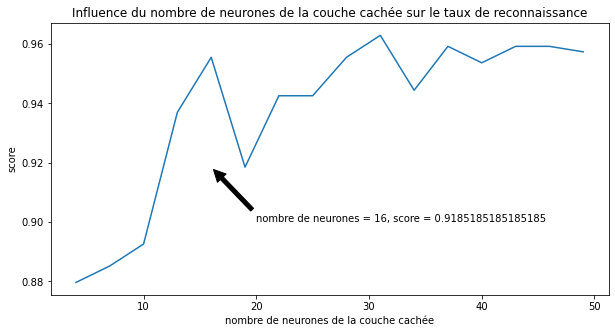

In [15]:
plt.figure(figsize=(10,5))
plt.title("Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.annotate('nombre de neurones = 16, score = ' + str(clfResults[5]) , xy= (16,clfResults[5]), xytext=( 20,0.9) ,arrowprops=dict(facecolor='black', shrink=0.05),)

plt.plot(list(range(4,50,3)),clfResults)

## Cross-validation

In [9]:
clfCV = MLPClassifier(hidden_layer_sizes=10, activation='tanh',validation_fraction=0.2, solver='sgd', batch_size=1, alpha=1, learning_rate='adaptive', verbose=0)
clfCV.fit(X_train,y_train)
clfCV.score(X_test,y_test)

0.587037037037037

In [23]:

clfCV = MLPClassifier(hidden_layer_sizes=10, activation='tanh',max_iter=500, solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1)
clfCV.fit(X_train,y_train)
clfCV.score(X_test,y_test)

Iteration 1, loss = 1.69190079
Iteration 2, loss = 1.15238069
Iteration 3, loss = 0.87410008
Iteration 4, loss = 0.74708089
Iteration 5, loss = 0.72218312
Iteration 6, loss = 0.62405483
Iteration 7, loss = 0.67061258
Iteration 8, loss = 0.58995723
Iteration 9, loss = 0.46994461
Iteration 10, loss = 0.53182800
Iteration 11, loss = 0.53644486
Iteration 12, loss = 0.41228371
Iteration 13, loss = 0.53902370
Iteration 14, loss = 0.45758972
Iteration 15, loss = 0.37682150
Iteration 16, loss = 0.38948021
Iteration 17, loss = 0.49496186
Iteration 18, loss = 0.51813025
Iteration 19, loss = 0.47041690
Iteration 20, loss = 0.34600172
Iteration 21, loss = 0.49477342
Iteration 22, loss = 0.42022200
Iteration 23, loss = 0.51763144
Iteration 24, loss = 0.52078817
Iteration 25, loss = 0.52871032
Iteration 26, loss = 0.47011087
Iteration 27, loss = 0.38394123
Iteration 28, loss = 0.31196329
Iteration 29, loss = 0.37613897
Iteration 30, loss = 0.39149325
Iteration 31, loss = 0.32262947
Iteration 32, los

0.9259259259259259

In [11]:
list (range(4,27,2))

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]